In [9]:
from sklearn import preprocessing # Biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulacao de arrays Numpy
from matplotlib.colors import ListedColormap # Lista de cores para plotagens
import pandas as pd

In [10]:
# Classe Adaline
class Adaline:
    # Construtor com informações setadas com o número de épocas máxima (epoch) e taxa de aprendizagem (eta)
    def __init__(self, eta = 0.001, epoch = 1000, goal = 0.000001):
        self.eta = eta # Taxa de aprendizagem, utilizada para impulsionar o movimento do hiperplano na separação de classes
        self.epoch = epoch # Determinação máxima de épocas no ajuste da RNA
        self.epochs = 0 # Contabilização do número de épocas no treinamento
        self.errorsTests = 0 # Utilizado para contabilizar a quantidade de amostras classificadas incorretamente nos testes da rede já treinada
        self.goal = goal # Definição do objetivo com parada definida no treinamento que é comparado com o cálculo do erro quadrático da época anterior com a atual
        self.history = [] # Histórico para armazenar pesos e limiar em cada época

    # Método para treinamento da rede
    def fit(self, X, y):
        # Inicialização dos pesos randomicamente - shape retorna a dimensão das entradas da RNA
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0

        for _ in range(self.epoch):
            # Obtenção da saída da rede baseada nos pesos sinápticos ajustados
            output = self.activation_function(X) # Valor do u
            # y é a saída desejada e output é a saída calculada, obtem-se um valor real
            error = y - output # verificação do erro

            # Ajuste do limiar de ativação
            self.weight_[0] += self.eta * sum(error)
            # Ajuste dos pesos sinápticos - Minimização do erro quadrático médio com a aplicação do gradiente do erro E(w)
            self.weight_[1:] += self.eta * X.T.dot(error) # dot efetua a multiplicação de matrizes, T calcula a transposta de X para poder efetuar a multiplicação segundo a regra - https://acervolima.com/diferenca-entre-a-operacao-numpy-dot-e-em-python/

            # Cálculo do erro quadrático E(w)
            self.cost = 1./2 * sum((error**2))

            # Armazena em mseP o mse da época anterior para poder comparar com o atual
            mseP = self.mse

            # Cálculo do erro quadrático médio mse(w) da época atual
            self.mse = 1./X.shape[0] * sum((error**2))

            # Armazena o histórico de pesos e limiar
            self.history.append({
                'Treinamento': f'T{self.epochs + 1}',
                'Limiar': self.weight_[0],
                'w1': self.weight_[1],
                'w2': self.weight_[2],
                'w3': self.weight_[3],
                'w4': self.weight_[4],
                'Época': self.epochs + 1
            })

            # Atualização do número de épocas
            self.epochs += 1

            # Permite verificar a diferença do erro somente na segunda passagem
            if self.epochs > 1:
                # Verfica se a diferença entre o erro da época anterior com a atual é menor que o objetivo pré-determinado
                if  mseP-self.mse < self.goal:
                    break

            # Armazena os erros quadráticos e os erros quadráticos médios em listas
            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self

    def net_input(self, X):
        # Calcula a entrada da rede por meio de um produto escalar (dot) dos valores de entrada com os pesos (Combinador Linear)
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        # Função de ativação que recebe o retorno do cálculo do método net_input
        return self.net_input(X)

    def predict(self, X, y_d): # y_d = saída desejada utilizada para verificar a acurácia no teste
        # Obtenção da saída calculada baseada no conjunto de entradas calculado com os pesos ajustados obtenção final pautada na função de ativação
        y = np.where(self.activation_function(X) >= 0.0, 1, -1)

        # Verificação se a amostra testada apresentou erro na classificação
        if y != y_d:
            self.errorsTests = self.errorsTests + 1
            return 'Erro'
        return 'Acerto'

    def print_history(self):
        # Gera uma tabela formatada com os valores dos pesos e limiar para cada época
        history_df = pd.DataFrame(self.history)
        table = history_df[['Treinamento', 'Limiar', 'w1', 'w2', 'w3', 'w4', 'Época']]
        print(table)
        return table

In [11]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("valvulas.csv")

# Separando a coluna da classe do dataset
y = df.iloc[:, 4].values

# Separando as colunas com as variáveis do dataset para determinar os inputs da RNA
X = df.iloc[:, [0,1,2,3]].values

# Normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
#scaler = preprocessing.MinMaxScaler()
#X = scaler.fit_transform(X)

# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

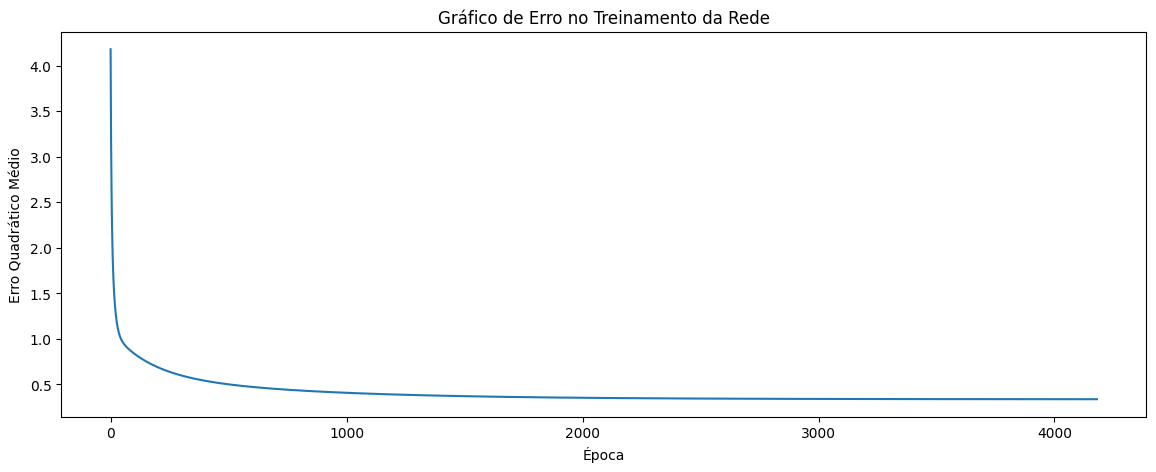

In [12]:
## Treinando a RNA com dados separados em 70% do dataset e validando com 30%

# Criando as fronteiras de decisão com Adaline
# eta é a taxa de aprendizagem
# epoch é o número de épocas
# critério de convergência é dado pelo goal
rede = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede.fit(X_train, y_train)

# Plotando o gráfico da descida do gradiente no processo de treinamento
plt.figure(figsize=(14,5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro Quadrático Médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de Erro no Treinamento da Rede')
plt.show()

In [13]:
# Gerando tabela de treinamento

rede.print_history()

     Treinamento    Limiar        w1        w2        w3        w4  Época
0             T1 -0.987445  0.672119  0.305198 -0.878164  0.544484      1
1             T2 -0.979578  0.672819  0.266476 -0.869069  0.485228      2
2             T3 -0.970290  0.674849  0.231145 -0.859624  0.434424      3
3             T4 -0.959895  0.677952  0.198820 -0.849936  0.390797      4
4             T5 -0.948656  0.681914  0.169166 -0.840094  0.353267      5
...          ...       ...       ...       ...       ...       ...    ...
4177       T4178  1.758376  1.376517  1.633604 -0.598149 -1.182309   4178
4178       T4179  1.758456  1.376518  1.633647 -0.598197 -1.182338   4179
4179       T4180  1.758537  1.376518  1.633690 -0.598246 -1.182367   4180
4180       T4181  1.758617  1.376519  1.633733 -0.598294 -1.182396   4181
4181       T4182  1.758698  1.376520  1.633776 -0.598342 -1.182424   4182

[4182 rows x 7 columns]


,Treinamento,Limiar,w1,w2,w3,w4,Época
0,T1,-0.987445,0.672119,0.305198,-0.878164,0.544484,1
1,T2,-0.979578,0.672819,0.266476,-0.869069,0.485228,2
2,T3,-0.970290,0.674849,0.231145,-0.859624,0.434424,3
3,T4,-0.959895,0.677952,0.198820,-0.849936,0.390797,4
4,T5,-0.948656,0.681914,0.169166,-0.840094,0.353267,5
...,...,...,...,...,...,...,...
4177,T4178,1.758376,1.376517,1.633604,-0.598149,-1.182309,4178
4178,T4179,1.758456,1.376518,1.633647,-0.598197,-1.182338,4179
4179,T4180,1.758537,1.376518,1.633690,-0.598246,-1.182367,4180
4180,T4181,1.758617,1.376519,1.633733,-0.598294,-1.182396,4181


In [14]:
# Testando a rede em lote de amostras
print("\nClassificações dos testes com amostras não apresentadas no treinamento:")

nTests = len(y_test)
for i in range(nTests):
    rede.predict(X_test[i,:], y_test[i])

print("Acurácia: ", (nTests-rede.errorsTests)/nTests*100, "%")
print("Quantidade de erros no teste em lote: ", rede.errorsTests)
print("Número de épocas do treinamento da RNA: ", rede.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede.weight_[0], "Pesos das entradas = ", rede.weight_[1:])


Classificações dos testes com amostras não apresentadas no treinamento:
Acurácia:  90.9090909090909 %
Quantidade de erros no teste em lote:  1
Número de épocas do treinamento da RNA:  4182
Erro quadrático médio final (MSE - Eqm(w)):  0.3377135132978312
Erro quadrático final (QE - E(w) - Custo):  3.8837054029250595
Vetor de pesos finais da RNA treinada - Limiar =  1.7586977587129817 Pesos das entradas =  [ 1.37651951  1.63377645 -0.59834209 -1.18242449]


In [15]:
## Treinando novamente com o dataset completo e validando com um novo dataset específico para teste

# Criando as fronteiras de decisão com Adaline
rede2 = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede2.fit(X, y)

# Caminho do dataset no Google Drive que será carregado em df
dft = pd.read_csv("valvulasTestes.csv")

# Separando a coluna da classe do dataset
yt = dft.iloc[:, 4].values

# Separando as colunas com as variáveis do dataset para determinar os inputs da RNA
Xt = dft.iloc[:, [0,1,2,3]].values

nTests = len(yt)

for i in range(nTests):
    print(rede2.predict(Xt[i,:], yt[i]))

print("Quantidade de erros no teste em lote: ", rede2.errorsTests)
print("Acurácia: ", (nTests-rede2.errorsTests)/nTests*100, "%")
print("Número de épocas do treinamento da RNA: ", rede2.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede2.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede2.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede2.weight_[0], "Pesos das entradas = ", rede2.weight_[1:])

Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Quantidade de erros no teste em lote:  0
Acurácia:  100.0 %
Número de épocas do treinamento da RNA:  1924
Erro quadrático médio final (MSE - Eqm(w)):  0.3095710462058865
Erro quadrático final (QE - E(w) - Custo):  5.26270778550007
Vetor de pesos finais da RNA treinada - Limiar =  1.7725408406937468 Pesos das entradas =  [ 1.30243344  1.62548236 -0.4231016  -1.16967868]


In [16]:
rede2.print_history()

     Treinamento    Limiar        w1        w2        w3        w4  Época
0             T1  0.184146 -0.586418  0.936984  0.134405 -0.016680      1
1             T2  0.186803 -0.574220  0.892928  0.136398 -0.084071      2
2             T3  0.193060 -0.560325  0.854862  0.139684 -0.135009      3
3             T4  0.201778 -0.545311  0.821578  0.143809 -0.173675      4
4             T5  0.212121 -0.529602  0.792156  0.148440 -0.203186      5
...          ...       ...       ...       ...       ...       ...    ...
1919       T1920  1.772160  1.302364  1.625279 -0.422856 -1.169533   1920
1920       T1921  1.772256  1.302381  1.625330 -0.422918 -1.169570   1921
1921       T1922  1.772351  1.302399  1.625381 -0.422979 -1.169606   1922
1922       T1923  1.772446  1.302416  1.625432 -0.423040 -1.169642   1923
1923       T1924  1.772541  1.302433  1.625482 -0.423102 -1.169679   1924

[1924 rows x 7 columns]


,Treinamento,Limiar,w1,w2,w3,w4,Época
0,T1,0.184146,-0.586418,0.936984,0.134405,-0.016680,1
1,T2,0.186803,-0.574220,0.892928,0.136398,-0.084071,2
2,T3,0.193060,-0.560325,0.854862,0.139684,-0.135009,3
3,T4,0.201778,-0.545311,0.821578,0.143809,-0.173675,4
4,T5,0.212121,-0.529602,0.792156,0.148440,-0.203186,5
...,...,...,...,...,...,...,...
1919,T1920,1.772160,1.302364,1.625279,-0.422856,-1.169533,1920
1920,T1921,1.772256,1.302381,1.625330,-0.422918,-1.169570,1921
1921,T1922,1.772351,1.302399,1.625381,-0.422979,-1.169606,1922
1922,T1923,1.772446,1.302416,1.625432,-0.423040,-1.169642,1923
